### DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.
You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

Check for null and unique values for test and train sets.

Apply label encoder.

Perform dimensionality reduction.

Predict your test_df values using XGBoost.

In [2]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
#load the datasets
train=pd.read_csv("train.csv")
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test=pd.read_csv("test.csv")
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
#extracting info of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [8]:
train.shape

(4209, 378)

In [19]:
#target variable
y_train=train["y"]
y_train.head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [29]:
#all the columns having 'X' in it
columns_x=[c for c in train.columns if 'X' in c]
print(len(columns_x))

376


In [30]:
#info of test dataset
test.shape

(4209, 377)

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [49]:
#features of train data
x_train=train.drop(columns="y",axis=1)
x_train.head(2)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,6,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0


In [51]:
#features of test data
x_test=test
x_test.head(2)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0


In [70]:
#to check for null values in the train,test dataset
def detect(df):
    if df.isnull().any().any():
        print("YES")
    else:
        print("NO")
    
detect(x_train)
detect(x_test)
# there are no missing values

NO
NO


In [77]:
#unique values in the train data
x_train.nunique()

ID      4209
X0        47
X1        27
X2        44
X3         7
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 377, dtype: int64

In [81]:
## EDA
# Integer Columns Analysis
unique_value_dict = {}
for col in x_train.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(x_train[col].unique()).tolist())
        t_list = unique_value_dict.get(unique_value, [])
        t_list.append(col)
        unique_value_dict[unique_value] = t_list[:]
for unique_val, columns in unique_value_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("-----------------------------------------------------------")

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

In [109]:
#remove columns with variance equal to 0
## means remove columns with only one unique value i.e 0
for column in x_train:
    length=len(np.unique(x_train[column]))
    if(length==1):
        x_train.drop(column,axis=1,inplace=True)
        x_test.drop(column,axis=1,inplace=True)

x_train.head(2)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,6,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0


In [116]:
#Label Encoding the categorical columns     
from sklearn import preprocessing

for f in ["X0","X1","X2","X3","X4","X5","X6","X8"]:
    lbl=preprocessing.LabelEncoder()
    lbl.fit(list(x_train[f].values))
    x_train[f]=lbl.transform(list(x_train[f].values))
    x_test[f]=lbl.transform(list(x_train[f].values))

In [121]:
x_train.head(3)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,32,23,17,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,6,32,21,19,4,3,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,7,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0


In [122]:
x_test.head(3)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,32,23,17,0,3,24,9,14,0,...,0,0,0,1,0,0,0,0,0,0
1,2,32,21,19,4,3,28,11,14,0,...,0,0,1,0,0,0,0,0,0,0
2,3,20,24,34,2,3,27,9,23,0,...,0,0,0,1,0,0,0,0,0,0


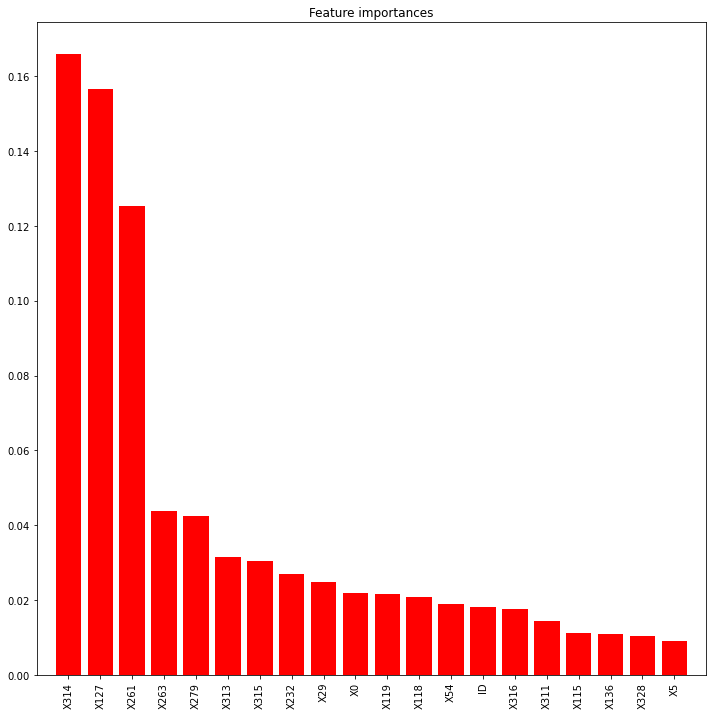

In [127]:
# Baseline Model - Random Forest Model
## check the important features
from sklearn import ensemble
model = ensemble.RandomForestRegressor(n_estimators=200, 
                                       max_depth=10, min_samples_leaf=4, 
                                       max_features=0.2, n_jobs=-1, 
                                       random_state=0)
model.fit(x_train, y_train)
feat_names = x_train.columns.values

# plot the importances 
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [134]:
# Dimensonality Reduction using Principal Components Analysis
from sklearn.decomposition import PCA
n_comp = 12
pca = PCA(n_components = n_comp, random_state = 123)
pca_result_train = pca.fit_transform(x_train)

### Applying XGBoost

In [133]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [135]:
x_train,x_valid,y_train,y_valid=train_test_split(pca_result_train,y_train,test_size=0.25,random_state=123)

In [136]:
f_train = xgb.DMatrix(x_train, label = y_train)
f_valid = xgb.DMatrix(x_valid, label = y_valid)

In [137]:
# Setting the parameters for XGB
params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02  ## eta means learning rate
params['max_depth'] = 4

In [138]:
# Predicting the score
# Creating a function for the same

def scorer(m, w):
    labels = w.get_label()
    return 'r2', r2_score(labels, m)

final_set = [(f_train, 'train'), (f_valid, 'valid')]

P = xgb.train(params, f_train, 1000, final_set, early_stopping_rounds=50, feval=scorer, maximize=True, verbose_eval=10)


[21:09:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.91817	train-r2:-59.64860	valid-rmse:99.15462	valid-r2:-60.88872
[10]	train-rmse:81.09502	train-r2:-39.76213	valid-rmse:81.31721	valid-r2:-40.62463
[20]	train-rmse:66.57175	train-r2:-26.46936	valid-rmse:66.78490	valid-r2:-27.07644
[30]	train-rmse:54.75213	train-r2:-17.58106	valid-rmse:54.95854	valid-r2:-18.01323
[40]	train-rmse:45.14637	train-r2:-11.63322	valid-rmse:45.33857	valid-r2:-11.93961
[50]	train-rmse:37.36312	train-r2:-7.65276	valid-rmse:37.55311	valid-r2:-7.87723
[60]	train-rmse:31.08142	train-r2:-4.98784	valid-rmse:31.28311	valid-r2:-5.16035
[70]	train-rmse:26.03580	train-r2:-3.20156	valid-rmse:26.25028	valid-r2:-3.33764
[80]	train-rmse:22.00853	train-r2:-2.00228	valid-rmse:22.24100	valid-r2:-2.11382
[90]	train-rmse:18.82390	train-r2:-1.19628	valid-rmse:19.09670	valid-r2:-1.29563
[100

In [144]:
# Predicting on test set
p_test = P.predict(f_valid)
p_test

array([108.78562 ,  94.384026,  99.53195 , ...,  81.76691 , 104.032196,
       102.25514 ], dtype=float32)

In [148]:
Predicted_Data = pd.DataFrame()
Predicted_Data['y'] = p_test
Predicted_Data.head()

,y
0,108.785622
1,94.384026
2,99.531952
3,76.932922
4,101.902710
